# Winsorization on *Anxiety and Depression Mental Health Factors* (Kaggle)

**Objective.** Following the Chapter 5 (Handling Outliers) recipe **Applying Winsorization**, 
we cap extreme values to reduce their impact **without dropping rows**.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['axes.grid'] = True
pd.set_option("display.max_columns", 50)

## 1. Load dataset

In [11]:
DATA_PATH = "anxiety_depression_data.csv"
df = pd.read_csv(DATA_PATH)
print(df.shape)
df.head()

(1200, 21)


,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,0,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,0,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,0,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,1,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,0,0,NaN,1,1,Frequent,8,9,5,7,7


## 2. Quick exploration

In [12]:
display(df.describe(include='all'))
print("\nDtypes:")
print(df.dtypes)

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
count,1200.000000,1200,1200,1200,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,453,1200.000000,1200.000000,366,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000
unique,NaN,4,5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,Female,PhD,Employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular,NaN,NaN,Occasional,NaN,NaN,NaN,NaN,NaN
freq,NaN,569,262,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238,NaN,NaN,242,NaN,NaN,NaN,NaN,NaN
mean,46.317500,NaN,NaN,NaN,6.46900,2.005750,5.055000,10.470000,10.674167,5.000833,0.318333,0.26750,NaN,0.210000,0.399167,NaN,4.992500,4.889167,5.062500,5.12000,4.959167
std,16.451157,NaN,NaN,NaN,1.52955,2.037818,2.652893,5.911138,5.632889,2.538281,0.466024,0.44284,NaN,0.407478,0.489931,NaN,2.590953,2.547016,2.531587,2.56991,2.566383
min,18.000000,NaN,NaN,NaN,2.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,NaN,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.00000,1.000000
25%,33.000000,NaN,NaN,NaN,5.40000,0.600000,3.000000,5.000000,6.000000,3.000000,0.000000,0.00000,NaN,0.000000,0.000000,NaN,3.000000,3.000000,3.000000,3.00000,3.000000
50%,46.000000,NaN,NaN,NaN,6.40000,1.400000,5.000000,10.500000,11.000000,5.000000,0.000000,0.00000,NaN,0.000000,0.000000,NaN,5.000000,5.000000,5.000000,5.00000,5.000000
75%,61.000000,NaN,NaN,NaN,7.50000,2.700000,7.000000,16.000000,15.000000,7.000000,1.000000,1.00000,NaN,0.000000,1.000000,NaN,7.000000,7.000000,7.000000,7.00000,7.000000



Dtypes:
Age                                int64
Gender                            object
Education_Level                   object
Employment_Status                 object
Sleep_Hours                      float64
Physical_Activity_Hrs            float64
Social_Support_Score               int64
Anxiety_Score                      int64
Depression_Score                   int64
Stress_Level                       int64
Family_History_Mental_Illness      int64
Chronic_Illnesses                  int64
Medication_Use                    object
Therapy                            int64
Meditation                         int64
Substance_Use                     object
Financial_Stress                   int64
Work_Stress                        int64
Self_Esteem_Score                  int64
Life_Satisfaction_Score            int64
Loneliness_Score                   int64
dtype: object


## 3. Select candidate numeric variables for Winsorization

In [13]:
preferred = ['Anxiety_Score','Depression_Score','Stress_Level','Sleep_Hours','Social_Support_Score']
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
candidates = [c for c in preferred if c in numeric_cols]
if len(candidates) < 3:
    extras = [c for c in numeric_cols if c not in candidates and c.lower() not in ['id','student_id','index','code','label','target']]
    candidates += extras[:max(0, 5 - len(candidates))]
print("Numeric columns:", numeric_cols)
print("Selected for winsorization:", candidates)

Numeric columns: ['Age', 'Sleep_Hours', 'Physical_Activity_Hrs', 'Social_Support_Score', 'Anxiety_Score', 'Depression_Score', 'Stress_Level', 'Family_History_Mental_Illness', 'Chronic_Illnesses', 'Therapy', 'Meditation', 'Financial_Stress', 'Work_Stress', 'Self_Esteem_Score', 'Life_Satisfaction_Score', 'Loneliness_Score']
Selected for winsorization: ['Anxiety_Score', 'Depression_Score', 'Stress_Level', 'Sleep_Hours', 'Social_Support_Score']


## 4. Winsorization (5th–95th percentiles)

In [14]:
def winsorize_by_quantiles(df, cols, lower_q=0.05, upper_q=0.95):
    df_out = df.copy()
    q_low  = df_out[cols].quantile(lower_q)
    q_high = df_out[cols].quantile(upper_q)
    for c in cols:
        df_out[c] = df_out[c].clip(lower=q_low[c], upper=q_high[c])
    return df_out, q_low, q_high

LOW_Q, HIGH_Q = 0.05, 0.95
df_wins, q_low, q_high = winsorize_by_quantiles(df, candidates, LOW_Q, HIGH_Q)
print("Lower quantiles:"); display(q_low.to_frame(f"p{int(LOW_Q*100)}"))
print("Upper quantiles:"); display(q_high.to_frame(f"p{int(HIGH_Q*100)}"))

Lower quantiles:


,p5
Anxiety_Score,1.000
Depression_Score,2.000
Stress_Level,1.000
Sleep_Hours,3.895
Social_Support_Score,1.000


Upper quantiles:


,p95
Anxiety_Score,19.0
Depression_Score,19.0
Stress_Level,9.0
Sleep_Hours,9.0
Social_Support_Score,9.0


In [15]:
OUT_CSV = "anxiety_depression_data_winsorized.csv"
df_wins.to_csv(OUT_CSV, index=False)
print("Saved:", OUT_CSV)

Saved: anxiety_depression_data_winsorized.csv


## 5. BEFORE vs AFTER — Histograms

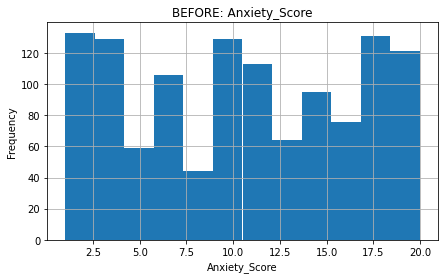

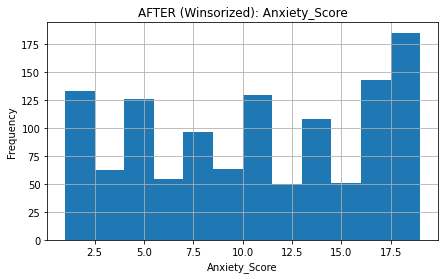

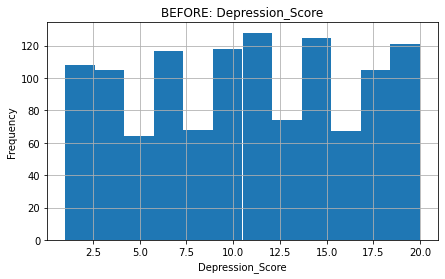

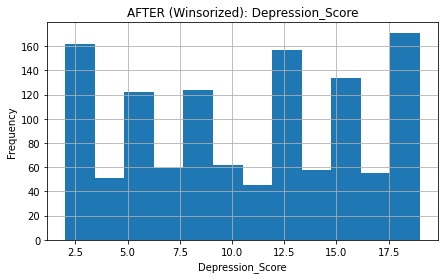

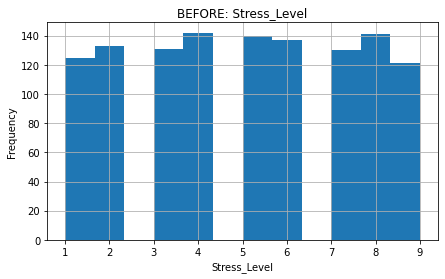

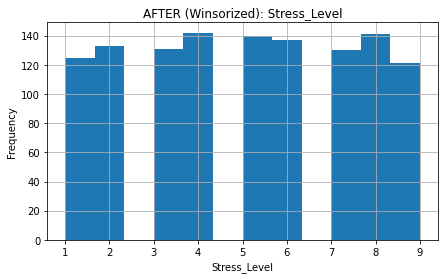

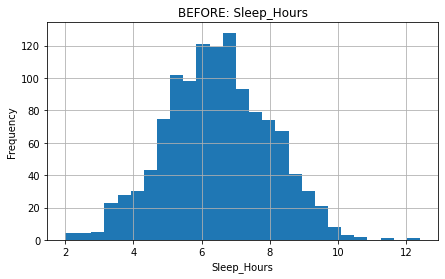

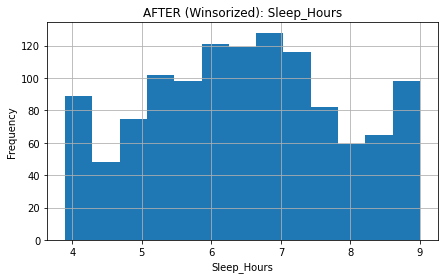

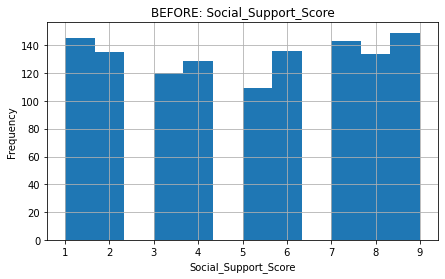

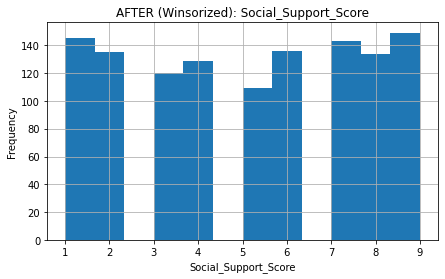

In [16]:
for col in candidates:
    plt.figure(); plt.hist(df[col].dropna(), bins='auto'); plt.title(f"BEFORE: {col}"); plt.xlabel(col); plt.ylabel("Frequency"); plt.show()
    plt.figure(); plt.hist(df_wins[col].dropna(), bins='auto'); plt.title(f"AFTER (Winsorized): {col}"); plt.xlabel(col); plt.ylabel("Frequency"); plt.show()

## 6. BEFORE vs AFTER — Boxplots

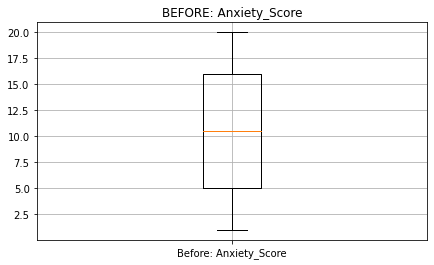

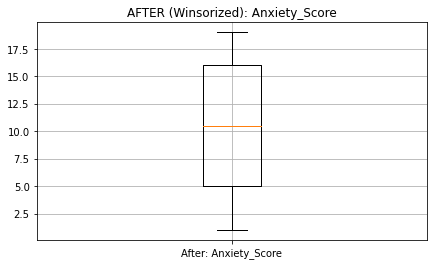

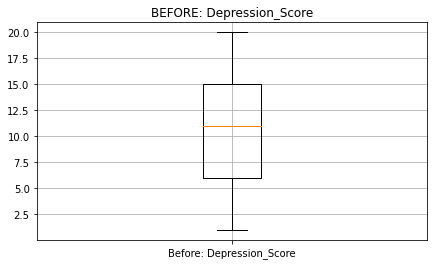

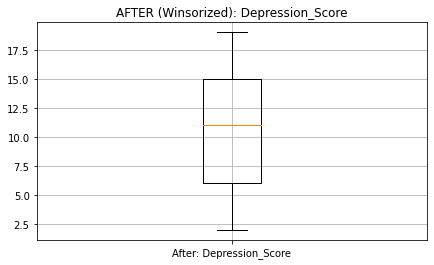

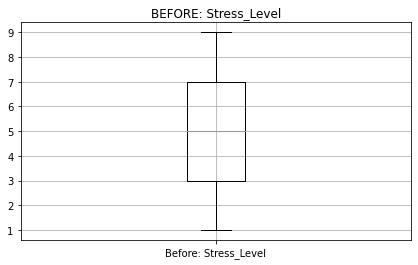

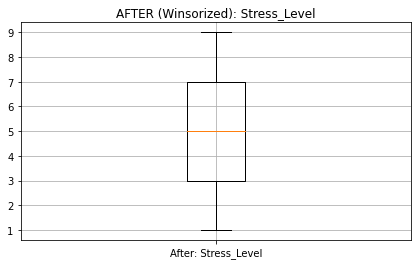

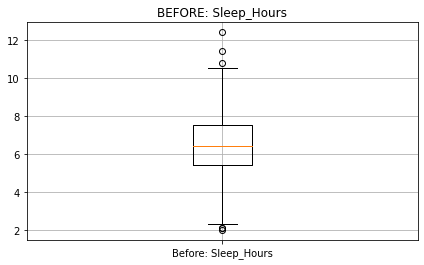

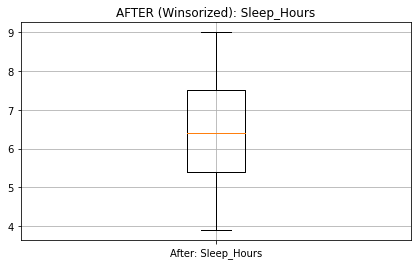

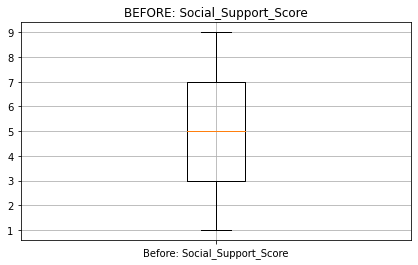

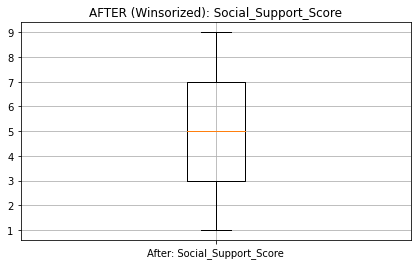

In [17]:
for col in candidates:
    plt.figure(); plt.boxplot([df[col].dropna()], labels=[f"Before: {col}"]); plt.title(f"BEFORE: {col}"); plt.show()
    plt.figure(); plt.boxplot([df_wins[col].dropna()], labels=[f"After: {col}"]); plt.title(f"AFTER (Winsorized): {col}"); plt.show()

## 7. Numeric summary — mean/std BEFORE vs AFTER

In [18]:
summary_rows = []
for col in candidates:
    summary_rows.append({
        "variable": col,
        "mean_before": float(np.nanmean(df[col])),
        "std_before": float(np.nanstd(df[col], ddof=1)),
        "mean_after": float(np.nanmean(df_wins[col])),
        "std_after": float(np.nanstd(df_wins[col], ddof=1)),
    })
summary_df = pd.DataFrame(summary_rows)
summary_df

,variable,mean_before,std_before,mean_after,std_after
0,Anxiety_Score,10.470000,5.911138,10.425833,5.843054
1,Depression_Score,10.674167,5.632889,10.672500,5.478923
2,Stress_Level,5.000833,2.538281,5.000833,2.538281
3,Sleep_Hours,6.469000,1.529550,6.468333,1.409875
4,Social_Support_Score,5.055000,2.652893,5.055000,2.652893


## 8. Notes
- Winsorization clips tails to chosen quantiles; adjust (e.g., 1–99%) when extremes are very severe.
- Always report thresholds and variables transformed.
- Compare downstream model results before vs after.